<a href="https://colab.research.google.com/github/skdrums/Mah-jongg/blob/master/mahjong_detection_2025051901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GPU確認、TPUではpytorchベースのyolov8は動かない
!nvidia-smi

## 実行mode(model作成:0, driveにあるモデルのマウント:1)
mode = 0
dataset_version = 8

## parameters
p = {
    'model': 'yolo11m.pt',
    'epochs': 300,
    'batch': 32,
    'imgsz': 640,
    'box':7.5, # default 7.5
    'cls':0.5, # default 0.5
    'dfl':1.5, # defalut 1.5
    'amp':True,
    'lr0':0.01, #defaut 0.01
}

## drive mount
from google.colab import drive
drive.mount('/content/drive')

Mon May 19 15:13:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x4X8SIyJoERoWiYw3LgT")
project = rf.workspace("mahjong-xonkr").project("mahjong-tile-detection-ewk89")
version = project.version(dataset_version)
dataset = version.download("yolov11")

In [ ]:
!yolo task=detect mode=train model={p['model']} data={dataset.location}/data.yaml epochs={p['epochs']} imgsz={p['imgsz']} amp={p['amp']} batch={p['batch']} cls={p['cls']} dfl={p['dfl']} box={p['box']} lr0={p['lr0']}

In [ ]:
!yolo detect val model=runs/detect/train2/weights/best.pt save_json=True data={dataset.location}/data.yaml

In [ ]:
## driveへモデルのアップロード

from google.colab import drive
drive.mount('/content/drive')

import shutil
from pathlib import Path
from datetime import datetime

# Drive保存先
drive_path = '/content/drive/MyDrive/mahjong_detector'
now_str = datetime.now().strftime('%Y%m%d%H%M%S')
file_name = f'yolov11_md_{now_str}'

# モデルフォルダを zip 圧縮（例：my_model -> my_model.zip）
shutil.make_archive(file_name, 'zip', '/content/runs')

# アップロード
save_dir = Path(f'{drive_path}/{file_name}')
save_dir.mkdir(parents=True, exist_ok=True)
shutil.copy(f'{file_name}.zip', f'{drive_path}/{file_name}/{file_name}.zip')

Saving Screenshot 2025-05-15 at 22.48.33.png to Screenshot 2025-05-15 at 22.48.33.png

image 1/1 /content/Screenshot 2025-05-15 at 22.48.33.png: 416x640 1 1p, 1 2p, 1 3m, 2 4ms, 2 4ss, 1 5m, 3 5ps, 1 5s, 1 6s, 1 7p, 1 8m, 1 8p, 4 9ms, 3 9ps, 1 9s, 1 chun, 1 pe, 3 shas, 1 ton, 60.3ms
Speed: 3.0ms preprocess, 60.3ms inference, 144.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


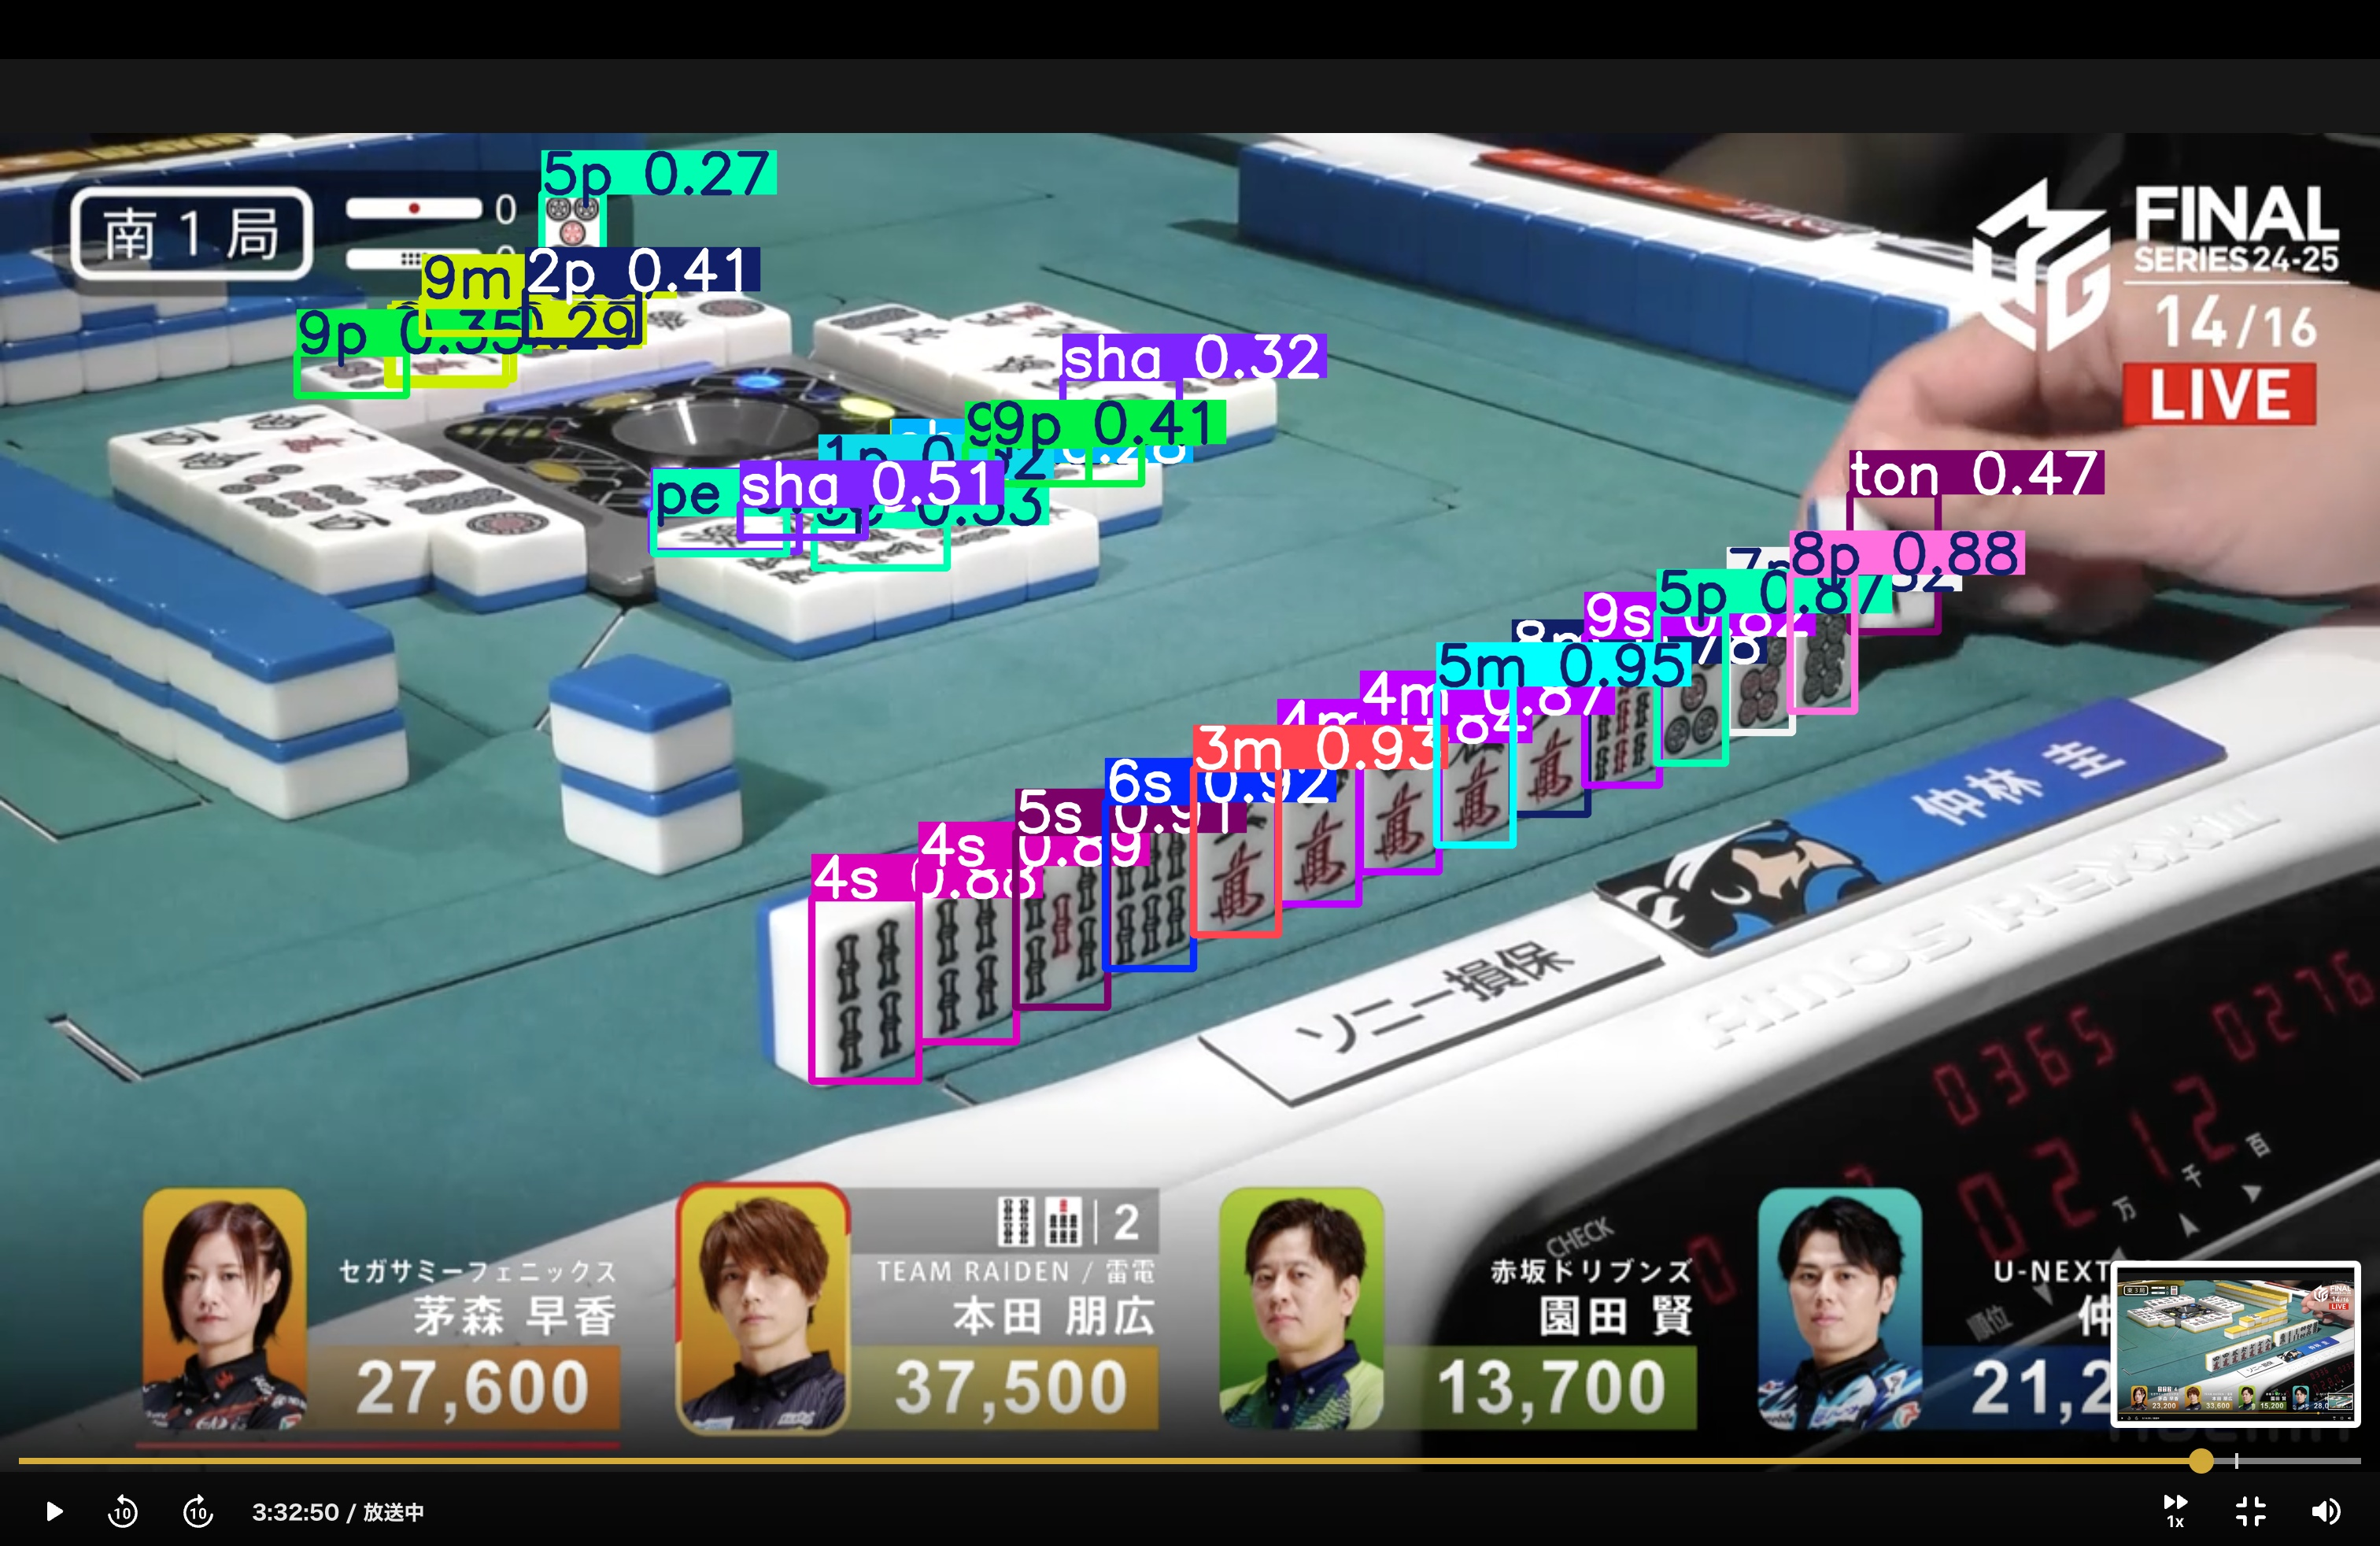

In [ ]:
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display
import glob

# モデルを読み込む
model = YOLO("runs/detect/train3/weights/best.pt")

# 画像をアップロード
uploaded = files.upload()
uploaded_image_path = next(iter(uploaded))

# 推論
results = model.predict(source=uploaded_image_path, save=True, conf=0.25)

# 拡張子を変更する
import os
new_extension = ".jpg"
predicted_image_path = os.path.splitext(uploaded_image_path)[0] + new_extension

# 結果画像を取得して表示
result_image_path = glob.glob("runs/detect/predict*/" + predicted_image_path)[-1]
display(Image(filename=result_image_path))

In [ ]:
## driveにあるモデルを解凍する
if mode > 0:
    import zipfile

    zip_path = '/content/drive/MyDrive/mahjong_detector/yolov8_mahjong_detector_20250514073212.zip'

    # 3. 解凍先のディレクトリ
    extract_to = '/content'

    # 4. zipファイルを解凍
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print("✅ 解凍が完了しました。")

✅ 解凍が完了しました。
